<span style="font-size:2em;">Discovering the Best Pokémon!</span>

This dataset contains information on 801 pokémon from the first seven generations. It includes base stats, performances against other types, heights, weights, classifications, egg steps, experience points, abilities, etc. The information was scraped from [serebii](http://serebii.net/) and has the following features:

- **abilities:** a stringified list of abilities that the pokémon is capable of having.
- **against_?:** eighteen features that denote the amount of damage taken against an attack of a particular type of pokémon.
- **attack:** the base attack of the pokémon.
- **base_egg_steps:** the number of steps required to hatch an egg of the pokémon.
- **base_happiness:** base happiness of the pokémon.
- **base_total:** sum of hp, attack, defense, sp_attack, sp_defense and speed.
- **capture_rate:** capture rate of the pokémon.
- **classification:** the classification of the pokémon as described by the Sun and Moon pokédex.
- **defense:** the base defense of the pokémon.
- **experience_growth:** the experience growth of the pokémon.
- **height_m:** height of the pokémon in metres.
- **hp:** the base HP of the pokemon. It is short for Hit Point, which determines how much damage a pokémon can receive before fainting.
- **japanese_name:** the original Japanese name of the pokémon.
- **name:** the English name of the pokémon.
- **percentage_male:** the percentage of the species that are male. Blank if the pokémon is genderless.
- **pokedex_number:** the entry number of the pokémon in the National Pokédex.
- **sp_attack:** the base special attack of the pokémon.
- **sp_defense:** the base special defense of the pokémon.
- **speed:** the base speed of the pokémon.
- **type1:** the primary type of the pokémon.
- **type2:** the secondary type of the pokémon.
- **weight_kg:** the weight of the pokémon in kilograms.
- **generation:** the numbered generation which the pokémon was first introduced.
- **is_legendary:** denotes if the pokémon is legendary.

Throughout this notebook, the characteristics of pokémon over the generations, which are the strongest generations and types and which pokémon are the most powerful will be analyzed.

# Imports

In [1]:
 # !pip install pywaffle
import warnings
from ast import literal_eval

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pywaffle import Waffle

warnings.filterwarnings('ignore')
from seaborn_plots_utils import (
    seaborn_plot,
    SEABORN_RC_PARAMS,
    SEABORN_STYLE,
)
from squarify_plots_utils import treemap

sns.set(rc=SEABORN_RC_PARAMS, style=SEABORN_STYLE)

# Descriptive Statistics

Let's load the dataset, look at the descriptive statistics and check for missing values.

In [2]:
pokemon_df = pd.read_csv('D:\\python\\Code\\DPW_Pokemon\\archive\\pokemon.csv')

print(f'Unique primary types: {pokemon_df["type1"].nunique()}')
print(f'Unique secondary types: {pokemon_df["type2"].nunique()}')

Unique primary types: 18
Unique secondary types: 18


In [3]:
pokemon_df.describe().T

,count,mean,std,min,25%,50%,75%,max
against_bug,801.0,9.962547e-01,0.597248,0.25,0.5,1.0,1.0,4.0
against_dark,801.0,1.057116e+00,0.438142,0.25,1.0,1.0,1.0,4.0
against_dragon,801.0,9.687890e-01,0.353058,0.00,1.0,1.0,1.0,2.0
against_electric,801.0,1.073970e+00,0.654962,0.00,0.5,1.0,1.0,4.0
against_fairy,801.0,1.068976e+00,0.522167,0.25,1.0,1.0,1.0,4.0
against_fight,801.0,1.065543e+00,0.717251,0.00,0.5,1.0,1.0,4.0
against_fire,801.0,1.135456e+00,0.691853,0.25,0.5,1.0,2.0,4.0
against_flying,801.0,1.192884e+00,0.604488,0.25,1.0,1.0,1.0,4.0
against_ghost,801.0,9.850187e-01,0.558256,0.00,1.0,1.0,1.0,4.0
against_grass,801.0,1.034020e+00,0.788896,0.25,0.5,1.0,1.0,4.0


In [4]:
pokemon_df.isnull().sum()[pokemon_df.columns[pokemon_df.isnull().any()]]

height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64

# Data Processing

Before the data visualization, let's discard unnecessary columns from the dataset and create some new ones that will be useful throughout the analysis. Plus, we are renaming columns and some values for plotting purposes.

In [5]:
pokemon_df.drop(
    ['japanese_name', 'pokedex_number', 'base_egg_steps', 'classfication', 'percentage_male'],
    axis=1,
    inplace=True,
)

pokemon_df.rename(str.title, axis='columns', inplace=True)

pokemon_df.replace(
    {
        'Is_Legendary': {
            0: "Non-legendary",
            1: "Legendary",
        },
    },
    inplace=True,
)

types = [t for t in list(pokemon_df['Type1'].unique())]
pokemon_df['Type1'].replace(types, [t.title() for t in types], inplace=True)
pokemon_df['Type2'].replace(types, [t.title() for t in types], inplace=True)

The first feature is created by joining type1 and type2 into a single type.

In [6]:
pokemon_df['Type'] = pokemon_df.apply(
    lambda x: x['Type1'] if pd.isnull(x['Type2']) else f'{x["Type1"]}_{x["Type2"]}',
    axis=1,
)

Since the abilities column is a stringified list, there is the need to convert it back to a list.

In [7]:
pokemon_df['Abilities'] = pokemon_df.apply(lambda x: literal_eval(x['Abilities']), axis=1)

The next step is to create a column with the number of abilities.

In [8]:
pokemon_df['N_Abilities'] = pokemon_df.apply(lambda x: len(x['Abilities']), axis=1)

We are also creating the BMI column, which represents the Body Mass Index of the pokémon. The formula is calculated by dividing the weight in kilograms by the square of the height in meters.

In [9]:
pokemon_df['BMI'] = pokemon_df.apply(lambda x: x['Weight_Kg'] / (x['Height_M']**2), axis=1)

Finally, Minior has two capture rates, so we are just ignoring such value by assigning it to NaN and changing the column type to numeric.

In [10]:
pokemon_df['Capture_Rate'].replace({'30 (Meteorite)255 (Core)': np.nan}, inplace=True)
pokemon_df['Capture_Rate'] = pd.to_numeric(pokemon_df['Capture_Rate'])

We are now ready to draw some plots!

# Data Visualization

We will go through the rest of this notebook creating different plots to answer some questions.

**How many new pokémon are there per generation?**

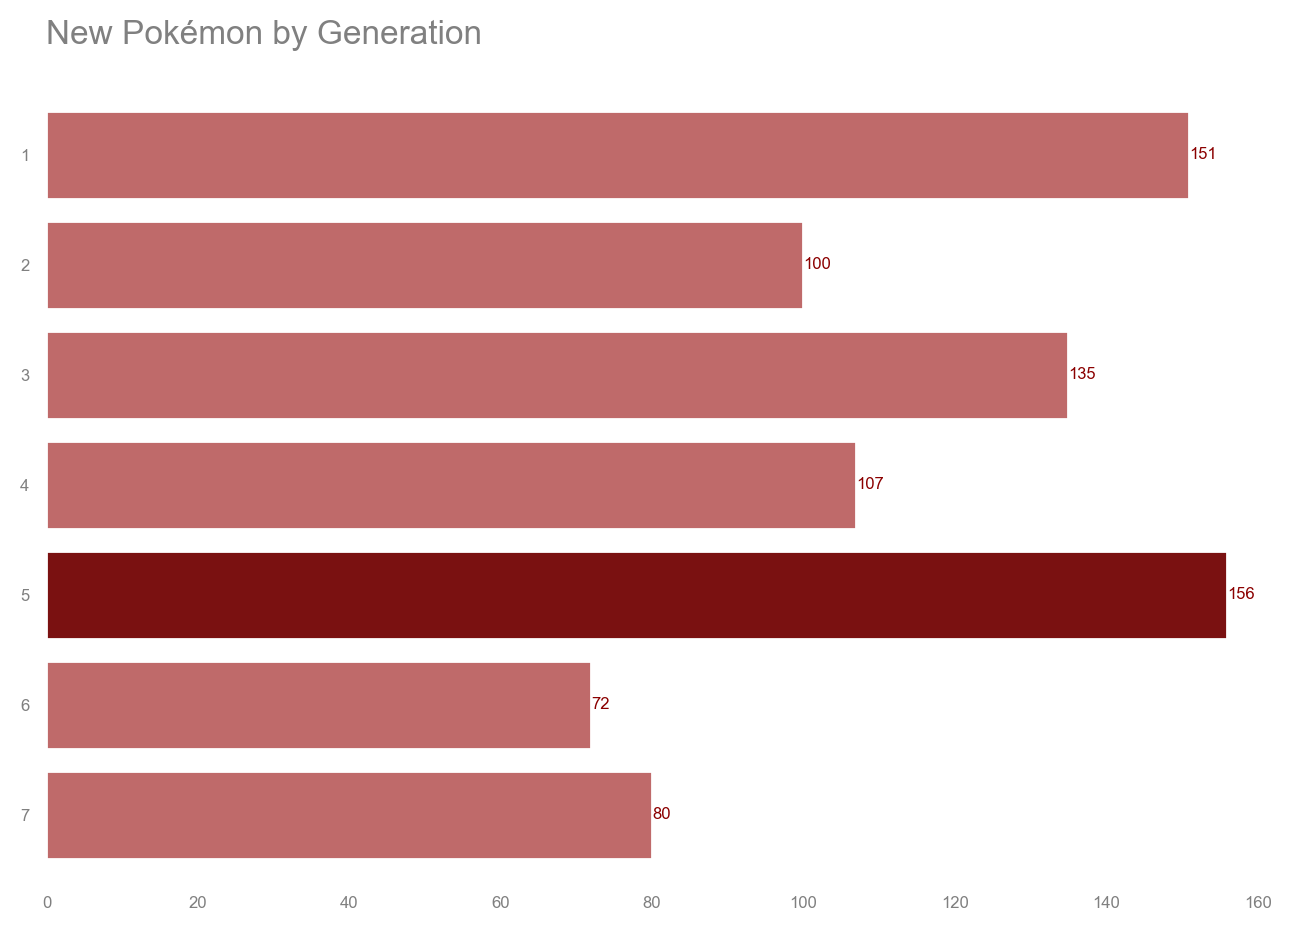

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 创建绘图
fig, ax = plt.subplots(figsize=(8, 5))

# 生成计数图
sns.countplot(
    data=pokemon_df,
    y='Generation',
    order=[1, 2, 3, 4, 5, 6, 7],  # 确保匹配数据中的值
    palette=['indianred', 'indianred', 'indianred', 'indianred', 'darkred', 'indianred', 'indianred'],
    ax=ax
)

# 移除轴标签
ax.set_xlabel('')
ax.set_ylabel('')

# 旋转 Y 轴标签对齐
plt.setp(ax.get_yticklabels(), ha='left')

# 移除边框
sns.despine(top=True, right=True, left=True, bottom=True)

# 添加数据标签
for p in ax.patches:
    ax.annotate(
        f'{p.get_width():.0f}',
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha='left', va='center',
        color='darkred'
    )

# 显示图形
plt.title("New Pokémon by Generation")
plt.show()


Odd generations have more new pokémon compared to even ones. The fifth generation has the most new Pokémon.

**What are the most prevalent primary types?**

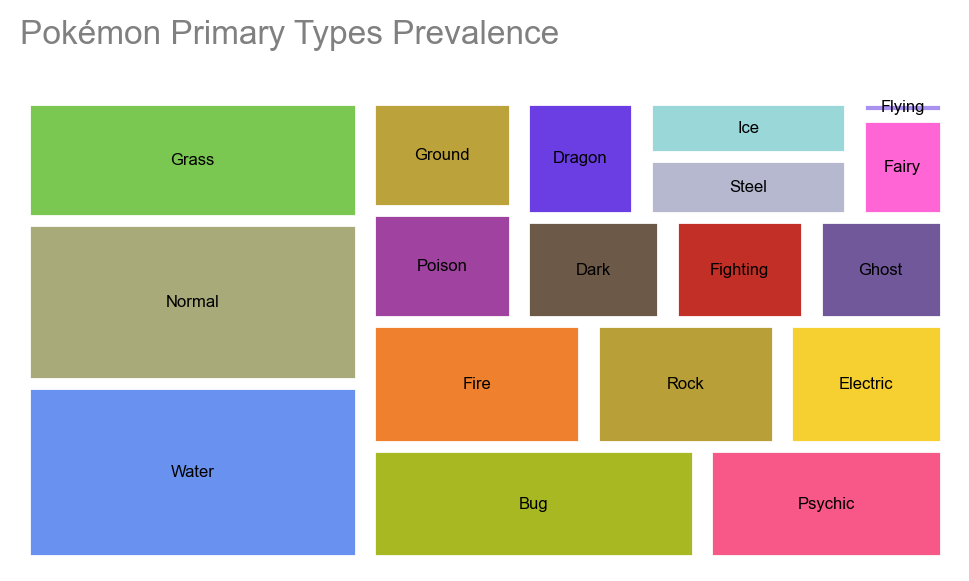

In [12]:
type1_value_counts = pokemon_df['Type1'].value_counts()

treemap(
    type1_value_counts,
    'Pokémon Primary Types Prevalence',
    label=type1_value_counts.index,
    color=[
        '#6991F0',
        '#A8AA79',
        '#7AC852',
        '#A7B822',
        '#F85887',
        '#EF812E',
        '#B99F38',
        '#F6D030',
        '#A0429F',
        '#BCA23B',
        '#6D5947',
        '#C12F27',
        '#70589A',
        '#6B3EE3',
        '#B6B8D0',
        '#9AD7D9',
        '#FF65D5',
        '#A991F0',
    ],
    pad=1,
    text_kwargs={'color': 'black'},
)

Water type pokémon are the most common, followed by normal and grass.

**What about secondary types?**

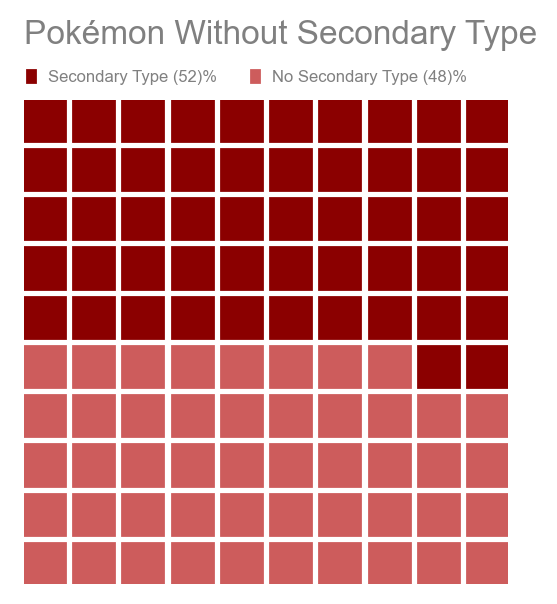

In [13]:
pokemon_without_secondary_type_percentage = round(pokemon_df["Type2"].isnull().sum() / len(pokemon_df) * 100)

fig = plt.figure(
    FigureClass=Waffle,
    figsize=(6, 3),
    rows=10,
    columns=10,
    values=[100 - pokemon_without_secondary_type_percentage, pokemon_without_secondary_type_percentage],
    colors=['darkred', 'indianred'],
    title={
        'label': 'Pokémon Without Secondary Type',
        'loc': 'left',
    },
    labels=[
        f'Secondary Type ({100- pokemon_without_secondary_type_percentage})%',
        f'No Secondary Type ({pokemon_without_secondary_type_percentage})%',
    ],
    legend={
        'loc': 'lower left',
        'bbox_to_anchor': (-0.025, 1),
        'ncol': 2,
        'handlelength': 0.5,
    },
    starting_location='NW',
    vertical=True,
    block_arranging_style='snake',
)

Almost half of Pokemon (48%) don't have a secondary type.

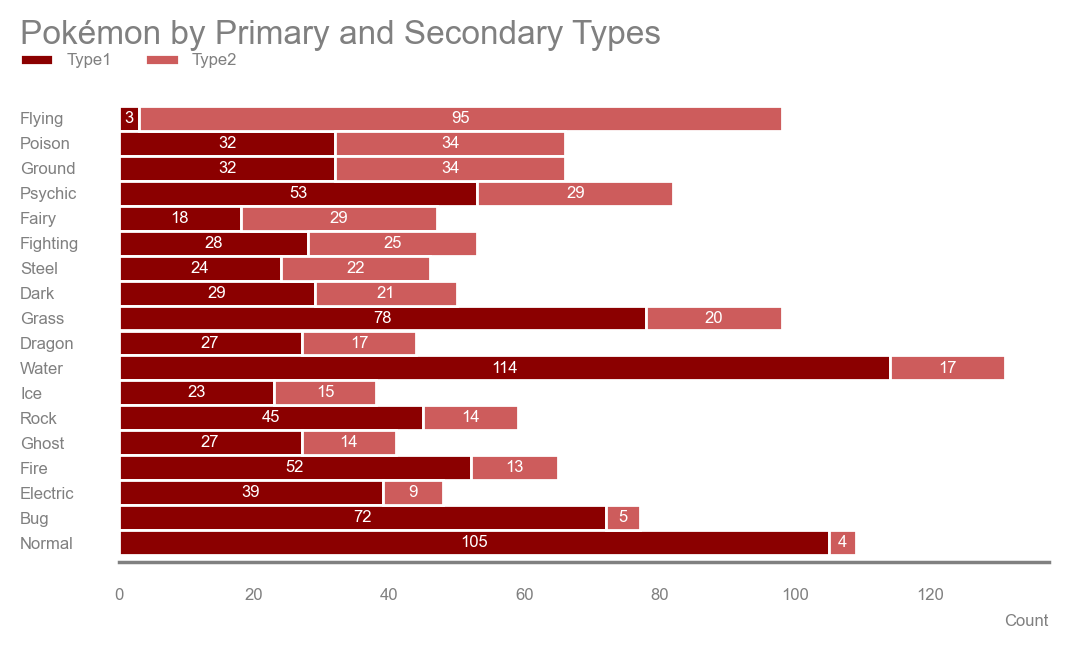

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_plots_utils import pandas_plot

# 统计 Primary 和 Secondary 类型的数量
type1_value_counts = pokemon_df['Type1'].value_counts()
type2_value_counts = pokemon_df['Type2'].value_counts()

# 合并并填充缺失值
types_df = pd.concat([type1_value_counts, type2_value_counts], axis=1, keys=['Type1', 'Type2'])
types_df = types_df.fillna(0).sort_values(by='Type2', ascending=False)

# 绘制堆叠柱状图
pandas_plot(
    types_df,
    {
        'kind': 'barh',
        'stacked': True,
        'color': ['darkred', 'indianred'],
        'width': 1,
    },
    title='Pokémon by Primary and Secondary Types',
    xlabel_kws={'xlabel': 'Count', 'loc': 'right'},
    yticklabels_kws={'ha': 'left'},
    pad_yticks=True,
    invert_yaxis=True,
    despine_kws={'top': True, 'right': True, 'left': True},
    legend_kws={'borderaxespad': 0, 'borderpad': 0},
    data_labels_kws={'fmt': '%0.f', 'color': 'white', 'label_type': 'center'},
    align_with='ytick_labels',
)

plt.show()

Flying is the most common type 2, followed by poison and ground.

**What are the most common type combinations?**

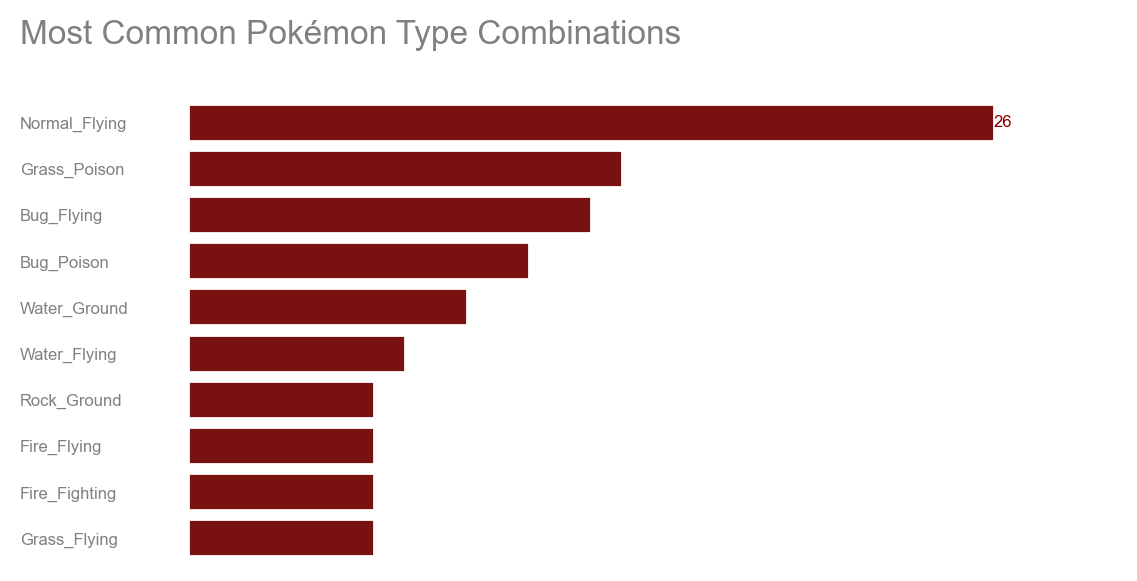

In [15]:
seaborn_plot(
    pokemon_df[~pokemon_df['Type2'].isnull()],
    sns.countplot,
    {
        'orient': 'h',
        'y': 'Type',
        'order': pokemon_df[~pokemon_df['Type2'].isnull()]["Type"].value_counts()[:10].index,
        'palette': ['darkred'],
    },
    'Most Common Pokémon Type Combinations',
    xlabel_kws={'xlabel': ''},
    xticks_kws={'labels': []},
    ylabel_kws={'ylabel': ''},
    yticks_kws={'ha': 'left'},
    pad_yticks=True,
    despine_kws={
        'top': True,
        'right': True,
        'left': True,
        'bottom': True,
    },
    data_labels_kws={
        'fmt': '%0.f',
        'color': 'darkred',
    },
    align_with='ytick_labels',
)

Normal + flying, grass + poison and bug + flying are the most common type combinations.

**What are the most common types of legendary pokémon?**

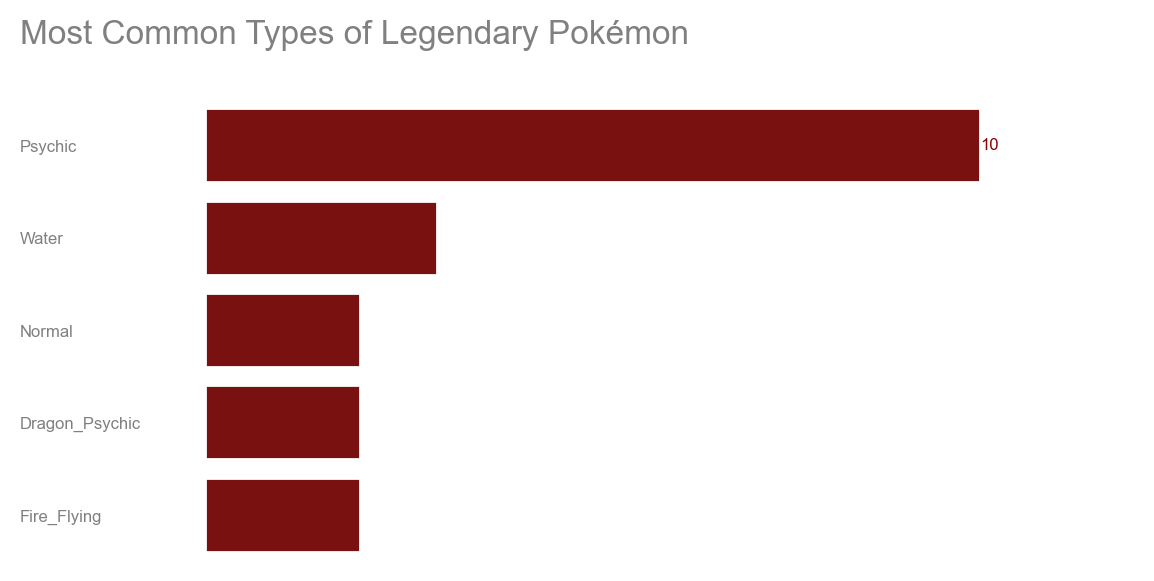

In [16]:
legendary_pokemon = pokemon_df[pokemon_df['Is_Legendary'] == 'Legendary']

seaborn_plot(
    legendary_pokemon,
    sns.countplot,
    {
        'orient': 'h',
        'y': 'Type',
        'order': legendary_pokemon["Type"].value_counts()[:5].index,
        'palette': ['darkred'],
    },
    'Most Common Types of Legendary Pokémon',
    xlabel_kws={'xlabel': ''},
    xticks_kws={'labels': []},
    ylabel_kws={'ylabel': ''},
    yticks_kws={'ha': 'left'},
    pad_yticks=True,
    despine_kws={
        'top': True,
        'right': True,
        'left': True,
        'bottom': True,
    },
    data_labels_kws={
        'fmt': '%0.f',
        'color': 'darkred',
    },
    align_with='ytick_labels',
)

Psychic is the most common type of legendary pokémon.

**How does primary type vary across generations?**

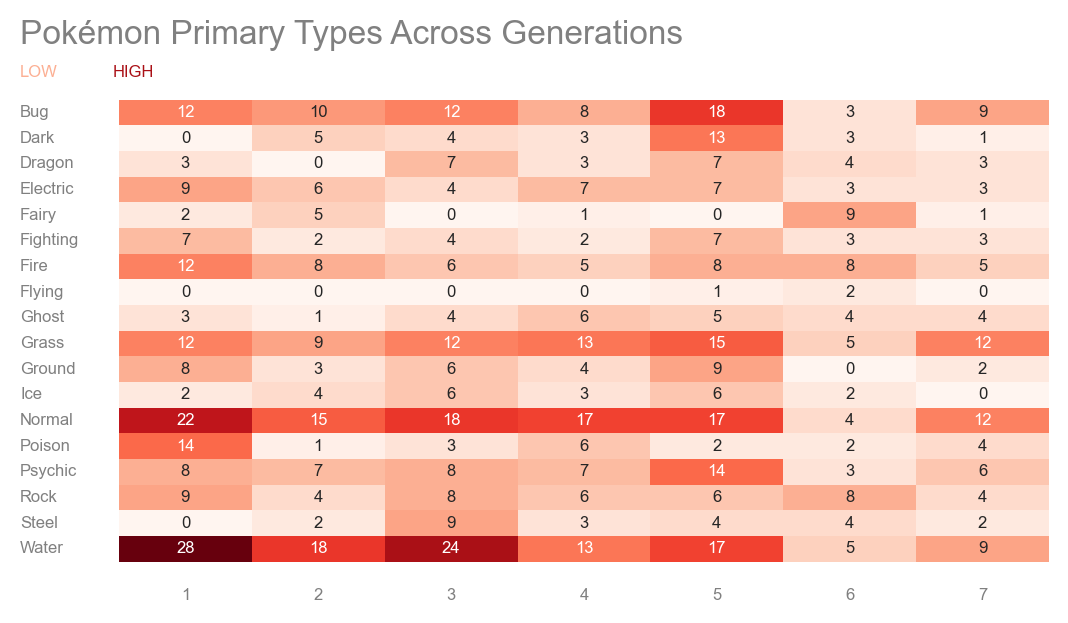

In [17]:
type1_by_generation = pd.crosstab(pokemon_df['Type1'], [pokemon_df['Generation']])

seaborn_plot(
    type1_by_generation,
    sns.heatmap,
    {
        'annot': True,
        'cbar': False,
        'cmap': 'Reds',
    },
    'Pokémon Primary Types Across Generations',
    xlabel_kws={'xlabel': ''},
    ylabel_kws={'ylabel': ''},
    yticks_kws={'ha': 'left'},
    pad_yticks=True,
    align_with='ytick_labels',
)

A few types don't exist in some generations, like dark, steel and flying in generation 1 and dragon and flying in generation 2.

Flying only exists as primary type in generations 5 and 6. 

There is an unusually high amount of poison type pokémon in the first generation, steel type in the third, dark and psychic type in the fifth and fairy in the sixth.

**Which generation has the easiest pokémon to catch?**

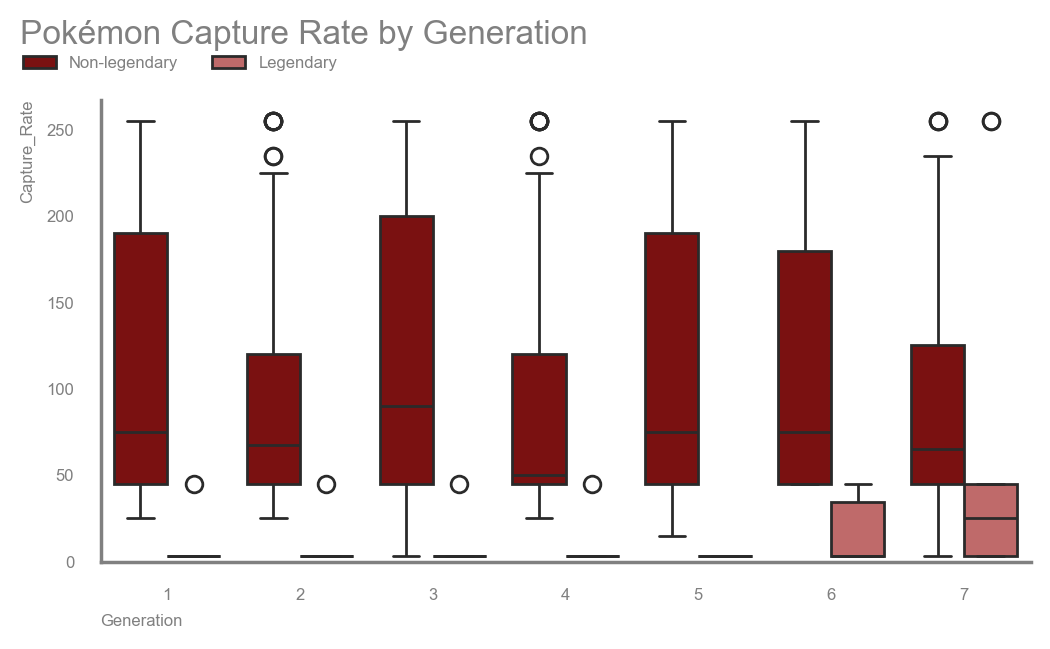

In [18]:
seaborn_plot(
    pokemon_df,
    sns.boxplot,
    {
        'x': 'Generation',
        'y': 'Capture_Rate',
        'hue': 'Is_Legendary',
        'palette': ['darkred', 'indianred'],
    },
    'Pokémon Capture Rate by Generation',
    ylim_kws={'bottom': 0},
    despine_kws={
        'top': True,
        'right': True,
    },
    legend_kws={
        'borderaxespad': 0.15,
        'borderpad': 0,
    },
)

Generation 3 has the easiest pokémon to catch, while generation 4 has the hardest.

Legendary pokémon are easier to capture from generation 6 onwards.

**Which type has the easiest pokémon to catch?**

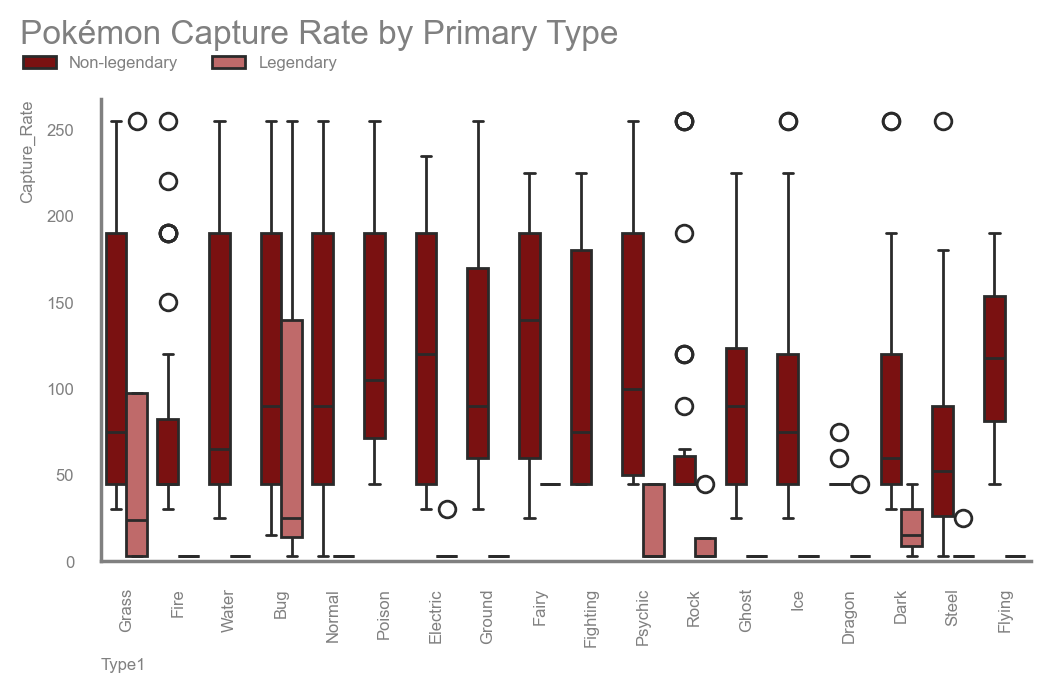

In [19]:
seaborn_plot(
    pokemon_df,
    sns.boxplot,
    {
        'x': 'Type1',
        'y': 'Capture_Rate',
        'hue': 'Is_Legendary',
        'palette': ['darkred', 'indianred'],
    },
    'Pokémon Capture Rate by Primary Type',
    xticks_kws={'rotation': 90},
    ylim_kws={'bottom': 0},
    despine_kws={
        'top': True,
        'right': True,
    },
    legend_kws={
        'borderaxespad': 0.15,
        'borderpad': 0,
    },
)

Fairy type has the easiest pokémon to catch, while dragon has the hardest.

The easiest legendary pokémon to catch are of type grass and bug.

**How many abilities do pokémon usually have?**

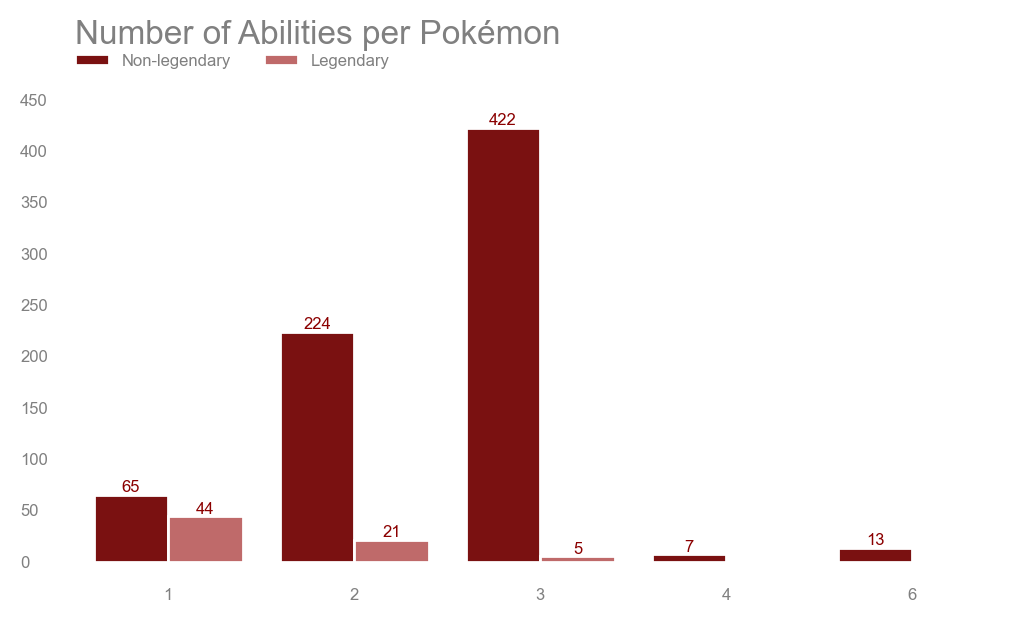

In [20]:
seaborn_plot(
    pokemon_df,
    sns.countplot,
    {
        'orient': 'v',
        'x': 'N_Abilities',
        'hue': 'Is_Legendary',
        'order': [1, 2, 3, 4, 6],
        'palette': ['darkred', 'indianred'],
    },
    'Number of Abilities per Pokémon',
    xlabel_kws={'xlabel': ''},
    ylabel_kws={'ylabel': ''},
    yticks_kws={'ha': 'left'},
    pad_yticks=True,
    despine_kws={
        'top': True,
        'right': True,
        'left': True,
        'bottom': True,
    },
    legend_kws={
        'borderaxespad': 0,
        'borderpad': 0,
    },
    data_labels_kws={
        'fmt': '%0.f',
        'color': 'darkred',
    },
    align_with='xaxis_label',
)

3 is the most common number of abilities for non-legendary pokémon, while most legendary pokémon only have 1 ability.

**What are the heavier and taller pokémon?**

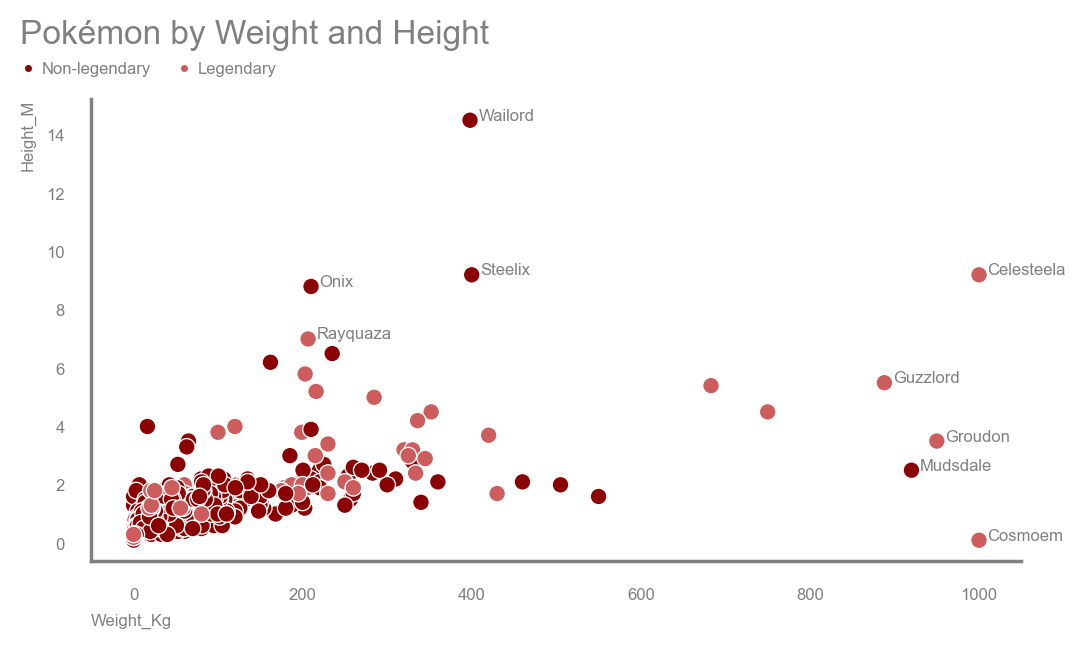

In [21]:
seaborn_plot(
    pokemon_df,
    sns.scatterplot,
    {
        'x': 'Weight_Kg',
        'y': 'Height_M',
        'hue': 'Is_Legendary',
        'palette': ['darkred', 'indianred'],
    },
    'Pokémon by Weight and Height',
    despine_kws={
        'top': True,
        'right': True,
    },
    legend_kws={
        'borderpad': 0,
        'markerscale': 0.5,
        'handlelength': 0,
    },
    plot_average=False,
)

# Label top 5 by weight and height
top5_weight_height_merged = pd.concat([
    pokemon_df.nlargest(5, 'Height_M'),
    pokemon_df.nlargest(5, 'Weight_Kg'),
]).drop_duplicates(subset=['Name'])
for index, row in top5_weight_height_merged.iterrows():
    plt.annotate(row['Name'], xy=(row['Weight_Kg'] + 10, row['Height_M']))

2 out of 5 of the tallest pokémon are legendary, while 4 out of 5 of the heavier pokémon are legendary.

Celesteela is the only pokémon in the top 5 in weight and height.

**Which pokémon has the highest BMI?**

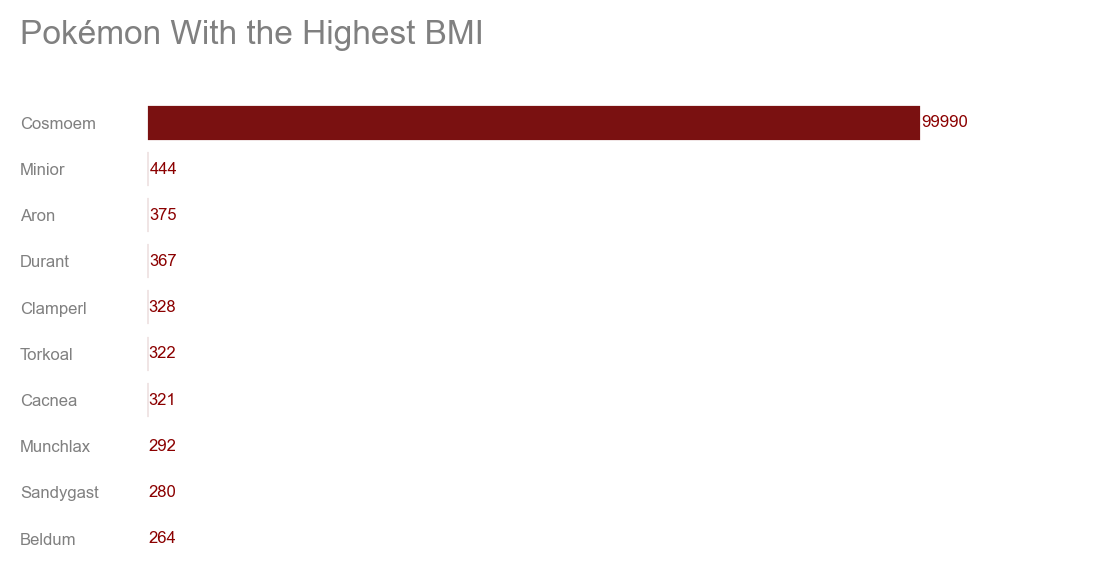

In [22]:
top10_highest_bmi = pokemon_df.loc[:, ['Name', 'BMI']].sort_values(by='BMI', ascending=False)[:10].reset_index()

seaborn_plot(
    top10_highest_bmi,
    sns.barplot,
    {
        'orient': 'h',
        'x': 'BMI',
        'y': 'Name',
        'color': 'darkred',
    },
    'Pokémon With the Highest BMI',
    xlabel_kws={'xlabel': ''},
    xticks_kws={'labels': []},
    ylabel_kws={'ylabel': ''},
    yticks_kws={'ha': 'left'},
    pad_yticks=True,
    despine_kws={
        'top': True,
        'right': True,
        'left': True,
        'bottom': True,
    },
    data_labels_kws={
        'fmt': '%0.f',
        'color': 'darkred',
    },
    align_with='ytick_labels',
)

Cosmoem is a clear winner!

**Which pokémon has the lowest BMI?**

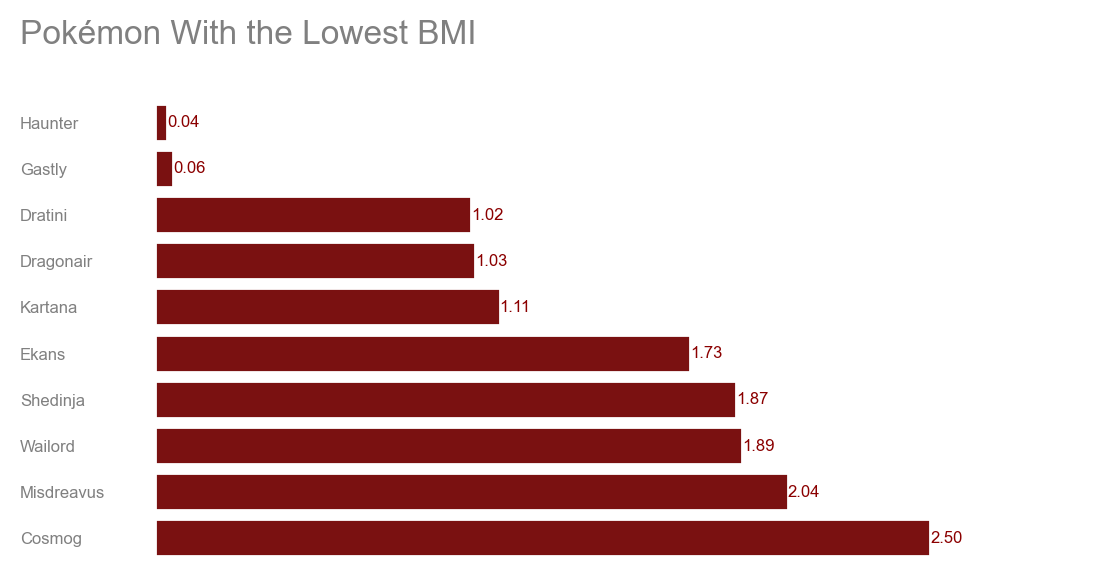

In [23]:
top10_lowest_bmi = pokemon_df.loc[:, ['Name', 'BMI']].sort_values(by='BMI', ascending=True)[:10].reset_index()

seaborn_plot(
    top10_lowest_bmi,
    sns.barplot,
    {
        'orient': 'h',
        'x': 'BMI',
        'y': 'Name',
        'color': 'darkred',
    },
    'Pokémon With the Lowest BMI',
    xlabel_kws={'xlabel': ''},
    xticks_kws={'labels': []},
    ylabel_kws={'ylabel': ''},
    yticks_kws={'ha': 'left'},
    pad_yticks=True,
    despine_kws={
        'top': True,
        'right': True,
        'left': True,
        'bottom': True,
    },
    data_labels_kws={
        'fmt': '%.2f',
        'color': 'darkred',
    },
    align_with='ytick_labels',
)

Haunter and its previous form (Gastly) are the winners, followed by Dratini and its evolution (Dragonair).

**Which is the best generation?**

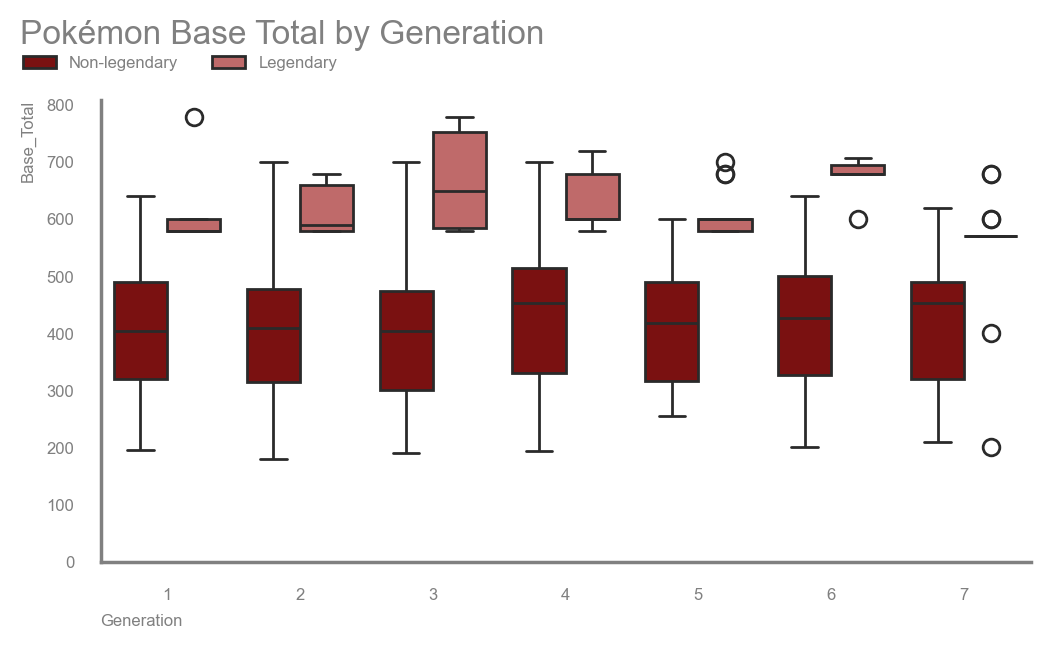

In [24]:
seaborn_plot(
    pokemon_df,
    sns.boxplot,
    {
        'x': 'Generation',
        'y': 'Base_Total',
        'hue': 'Is_Legendary',
        'palette': ['darkred', 'indianred'],
    },
    'Pokémon Base Total by Generation',
    ylim_kws={'bottom': 0},
    despine_kws={
        'top': True,
        'right': True,
    },
    legend_kws={
        'borderaxespad': 0.15,
        'borderpad': 0,
    },
)

Generation 4 has the best pokémon, while generation 3 has the best legendary pokémon.

**How are attributes related?**

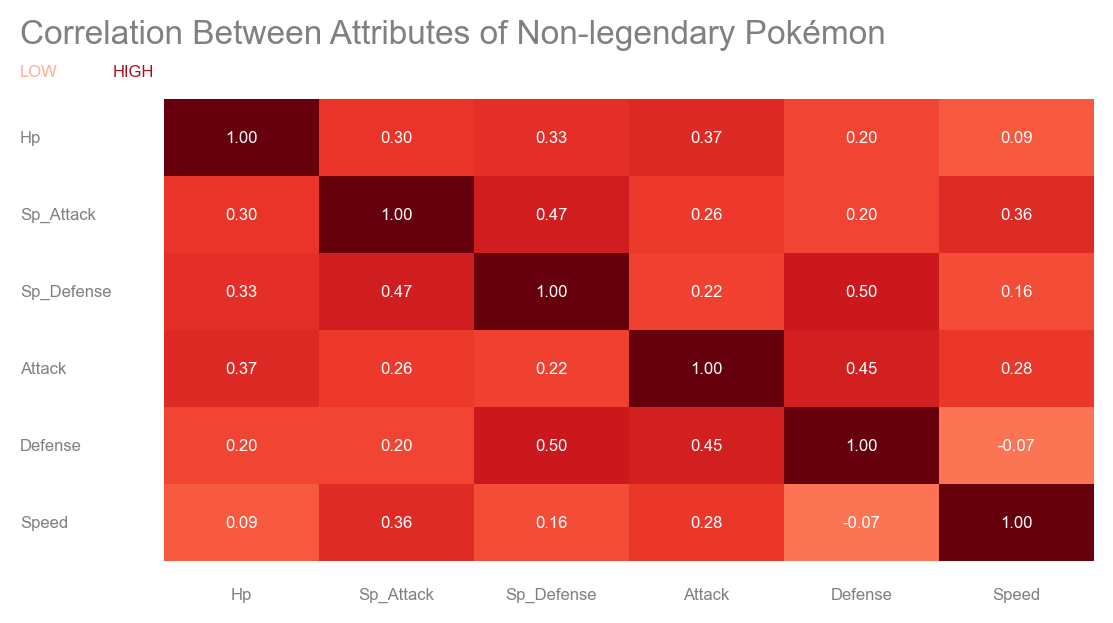

In [25]:
seaborn_plot(
    pokemon_df[pokemon_df['Is_Legendary'] == 'Non-legendary'
               ].loc[:, ['Hp', 'Sp_Attack', 'Sp_Defense', 'Attack', 'Defense', 'Speed']].corr(),
    sns.heatmap,
    {
        'annot': True,
        'cbar': False,
        'cmap': 'Reds',
        'fmt': '.2f',
        'vmin': -1,
        'vmax': 1,
    },
    'Correlation Between Attributes of Non-legendary Pokémon',
    xlabel_kws={'xlabel': ''},
    ylabel_kws={'ylabel': ''},
    yticks_kws={'ha': 'left'},
    pad_yticks=True,
    align_with='ytick_labels',
)

* Regarding non-legendary pokémon:
    
    - There seems to be a positive relationship between hp and sp_attack, sp_defense and attack. Such relationship is less significant for defense, which is kind of surprising, I thought a defensive Pokemon would have a higher hp.
    - Attack has the strongest relationship with defense.
    - Defense has the strongest relationship with sp_defense.
    - Speed has a very weak negative relationship with defense.

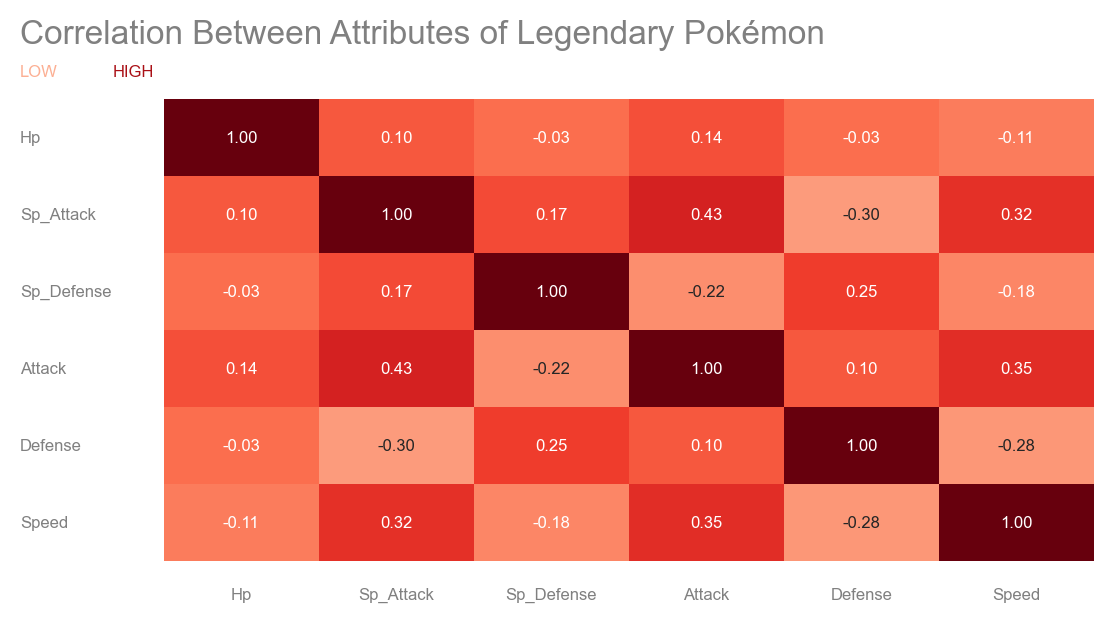

In [26]:
seaborn_plot(
    pokemon_df[pokemon_df['Is_Legendary'] == 'Legendary'
               ].loc[:, ['Hp', 'Sp_Attack', 'Sp_Defense', 'Attack', 'Defense', 'Speed']].corr(),
    sns.heatmap,
    {
        'annot': True,
        'cbar': False,
        'cmap': 'Reds',
        'fmt': '.2f',
        'vmin': -1,
        'vmax': 1,
    },
    'Correlation Between Attributes of Legendary Pokémon',
    xlabel_kws={'xlabel': ''},
    ylabel_kws={'ylabel': ''},
    yticks_kws={'ha': 'left'},
    pad_yticks=True,
    align_with='ytick_labels',
)

Considering legendary pokémon, the relationships between attack and sp_defense and defense and sp_attack changed to negative. Plus, the relationship between attack and speed and defense and speed got stronger (positive and negative, respectively). 

**Which is the best type?**

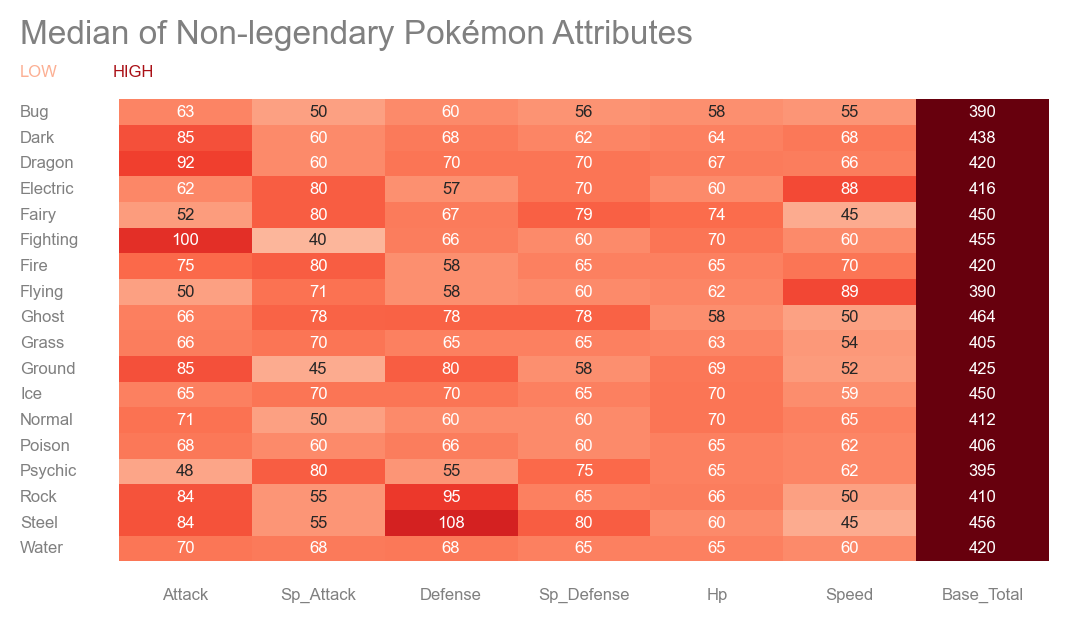

In [28]:
seaborn_plot(
    pokemon_df[pokemon_df['Is_Legendary'] == 'Non-legendary']
        .groupby(['Type1'])  # Group by Type1
        [['Attack', 'Sp_Attack', 'Defense', 'Sp_Defense', 'Hp', 'Speed', 'Base_Total']]
        .median(numeric_only=True),  # Calculate the median of each attribute
    sns.heatmap,
    {
        'annot': True,
        'cbar': False,
        'cmap': 'Reds',
        'fmt': '.0f',
        'vmin': 0,
        'vmax': 150,
    },
    'Median of Non-legendary Pokémon Attributes',
    xlabel_kws={'xlabel': ''},
    ylabel_kws={'ylabel': ''},
    yticks_kws={'ha': 'left'},
    pad_yticks=True,
    align_with='ytick_labels',
)

* Regarding non-legendary pokémon:
    - Top 5 types - attack: fighting, dragon, ground, dark, steel
    - Top 5 types - sp_attack: psychic, electric, fairy, fire, ghost
    - Top 5 types - defense: steel, rock, ground, ghost, ice
    - Top 5 types - sp_defense: steel, fairy, ghost, psychic, dragon
    - Top 5 types - hp: fairy, normal, fighting, ice, ground
    - Top 5 types - speed: flying, electric, fire, dark, dragon
    - Top 5 types - base_total: ghost, steel, fighting, fairy and ice

Good types to attack are electric, fire, dark and dragon, since they are in the top 5 for attack or sp_attack and speed.

Good types to defend are fairy, ice and ground, since they are in the top 5 for defense or sp_defense and hp.

To highlight ground, which is in the top 5 for attack, defense and hp. However, it is not in the top5 for base_total, due to its low values for sp_attack, sp_defense and speed.

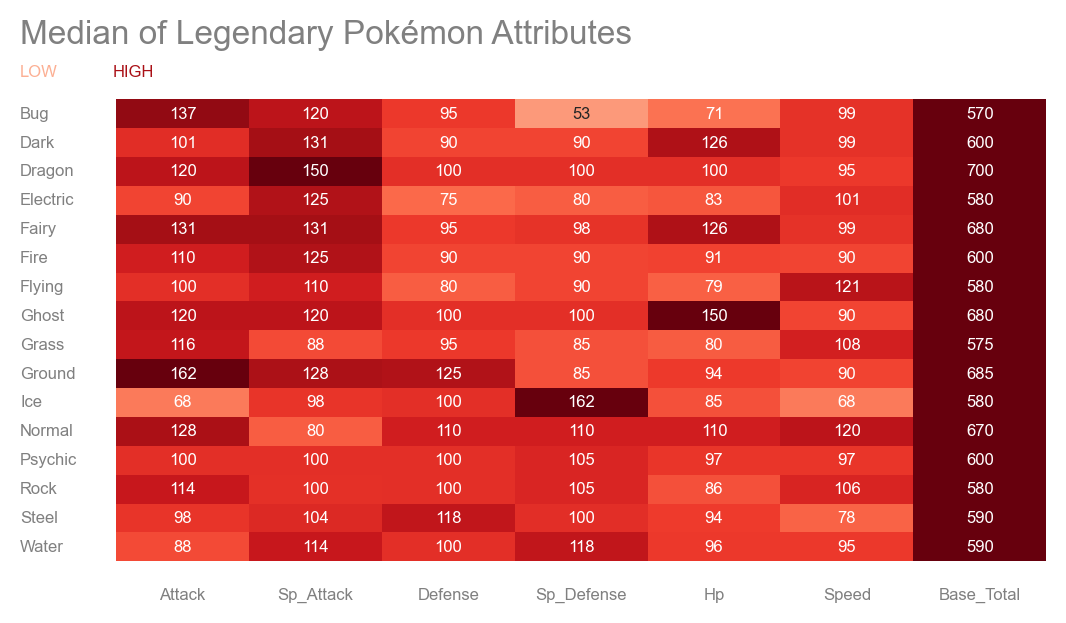

In [30]:
seaborn_plot(
    pokemon_df[pokemon_df['Is_Legendary'] == 'Legendary']
        .groupby(['Type1'])  # Group by Type1
        [['Attack', 'Sp_Attack', 'Defense', 'Sp_Defense', 'Hp', 'Speed', 'Base_Total']]
        .median(numeric_only=True),  # 强制仅处理数值列
    sns.heatmap,
    {
        'annot': True,
        'cbar': False,
        'cmap': 'Reds',
        'fmt': '.0f',
        'vmin': 0,
        'vmax': 150,
    },
    'Median of Legendary Pokémon Attributes',
    xlabel_kws={'xlabel': ''},
    ylabel_kws={'ylabel': ''},
    yticks_kws={'ha': 'left'},
    pad_yticks=True,
    align_with='ytick_labels',
)

* Regarding legendary pokémon:
    - Top 5 types - attack: ground, bug, fairy, normal, dragon
    - Top 5 types - sp_attack: dragon, dark, fairy, ground, electric
    - Top 5 types - defense: ground, steel, normal, dragon, ghost
    - Top 5 types - sp_defense: ice, water, normal, psychic, rock
    - Top 5 types - hp: ghost, dark, fairy, normal, dragon
    - Top 5 types - speed: flying, normal, grass, rock, electric
    - Top 5 types - base_total: dragon, ground, fairy, ghost, normal

Good types to attack are normal and electric, since they are in the top 5 for attack or sp_attack and speed.

Good types to defend are ghost, normal and dragon, since they are in the top 5 for defense or sp_defense and hp.

To highlight normal, which is in the top 5 for attack, defense, sp_defense, hp and speed. However, it is only fifth in base_total.

**Let's analyze type effectiveness.**

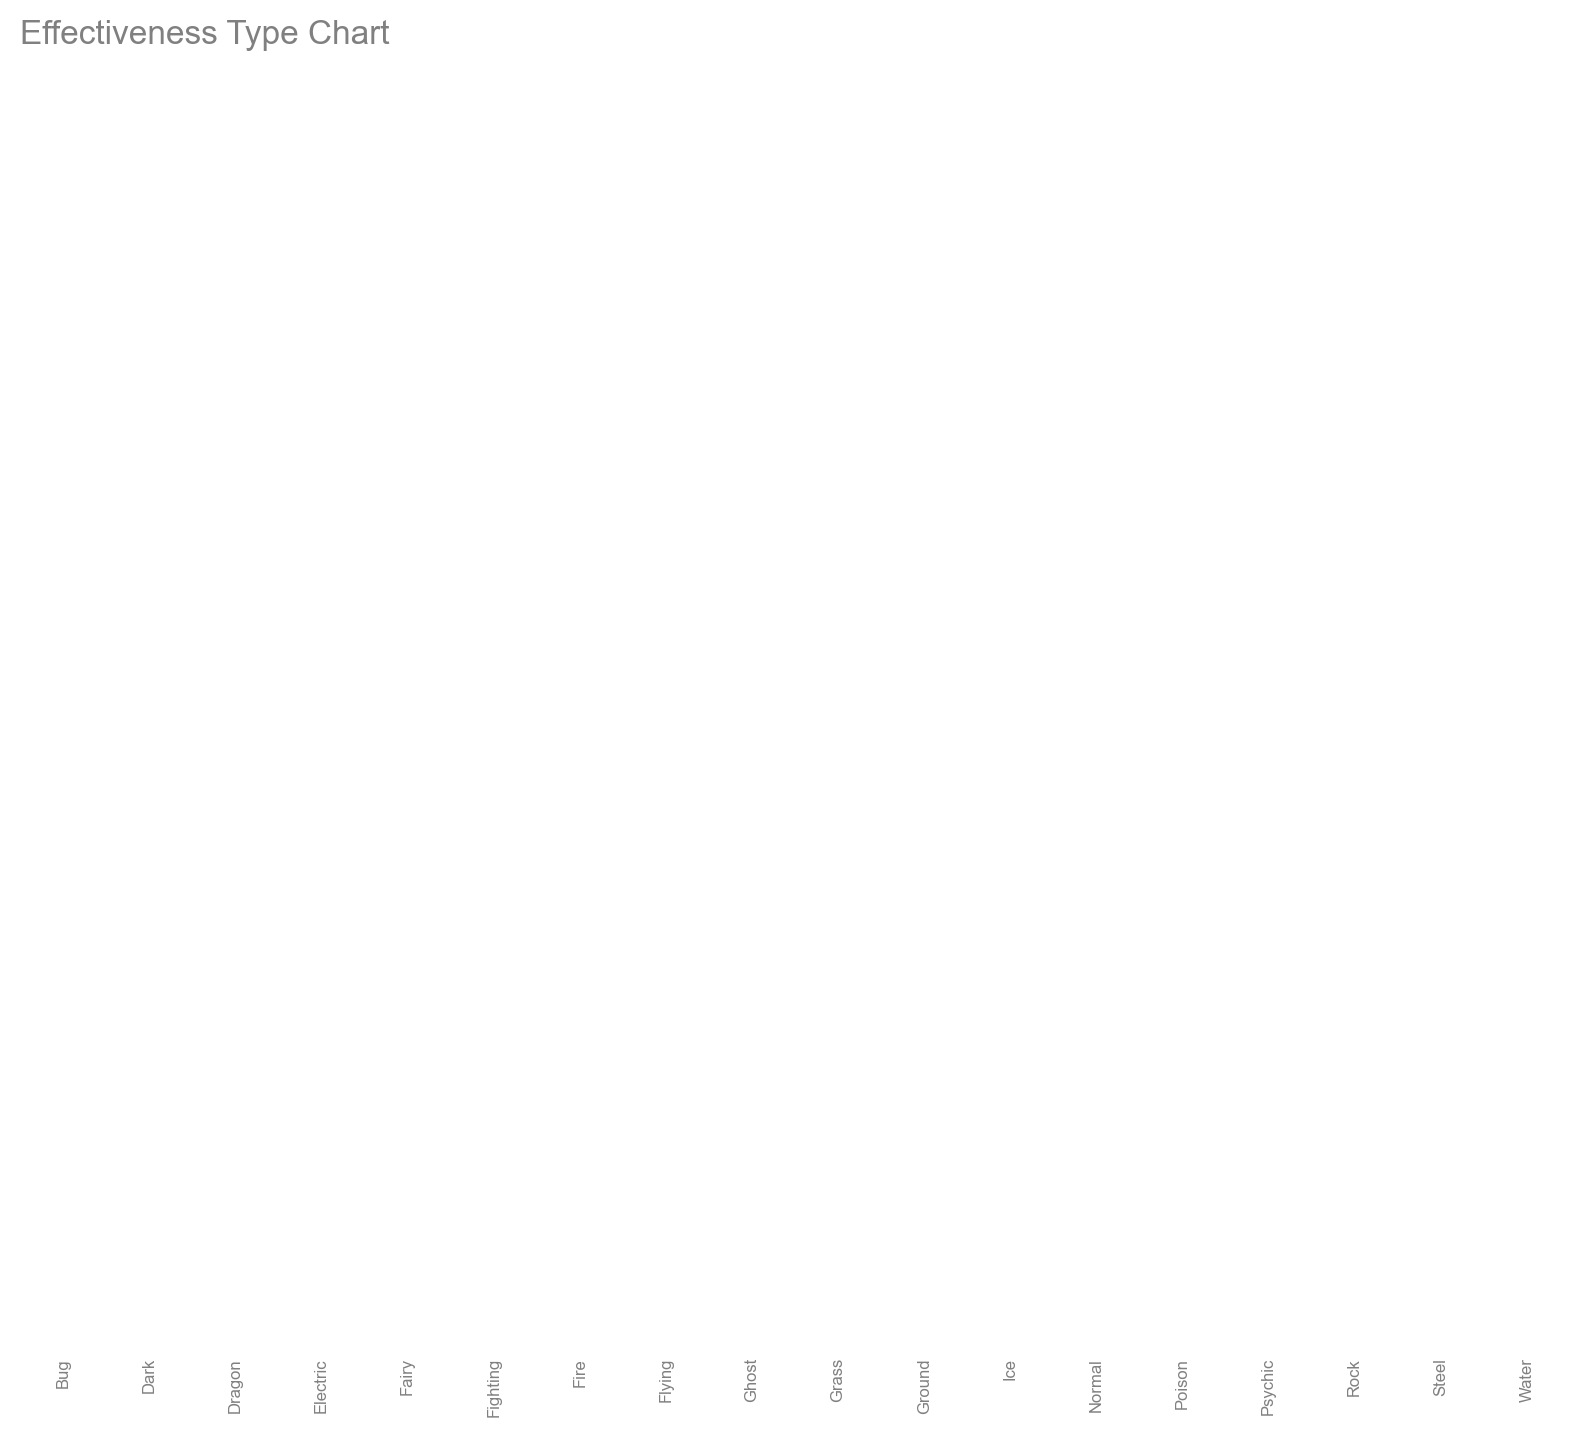

In [38]:
# against_columns = [
#     'against_bug',
#     'against_dark',
#     'against_dragon',
#     'against_electric',
#     'against_fairy',
#     'against_fight',
#     'against_fire',
#     'against_flying',
#     'against_ghost',
#     'against_grass',
#     'against_ground',
#     'against_ice',
#     'against_normal',
#     'against_poison',
#     'against_psychic',
#     'against_rock',
#     'against_steel',
#     'against_water',
# ]
#
# # Ensure all against_columns are numeric
# pokemon_df[against_columns] = pokemon_df[against_columns].apply(pd.to_numeric, errors="coerce")
#
# # Now compute the median
# pokemon_type_effectiveness = pokemon_df.groupby(['type1']).median()[against_columns].T
#
# seaborn_plot(
#     pokemon_type_effectiveness,
#     sns.heatmap,
#     {
#         'annot': True,
#         'cbar': False,
#         'cmap': 'Reds',
#         'fmt': '.1f',
#         'vmin': 0,
#         'vmax': 4,
#     },
#     'Effectiveness Type Chart',
#     xlabel_kws={'xlabel': ''},
#     xticks_kws={'rotation': 90},
#     ylabel_kws={'ylabel': ''},
#     yticks_kws={'ha': 'left'},
#     pad_yticks=True,
#     align_with='ytick_labels',
# )
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to ensure are numeric
against_columns = [
    'against_bug',
    'against_dark',
    'against_dragon',
    'against_electric',
    'against_fairy',
    'against_fight',
    'against_fire',
    'against_flying',
    'against_ghost',
    'against_grass',
    'against_ground',
    'against_ice',
    'against_normal',
    'against_poison',
    'against_psychic',
    'against_rock',
    'against_steel',
    'against_water',
]

# Check if all columns exist in the DataFrame
existing_columns = [col for col in against_columns if col in pokemon_df.columns]

# Ensure all existing columns are numeric
pokemon_df[existing_columns] = pokemon_df[existing_columns].apply(pd.to_numeric, errors="coerce")

# Filter the DataFrame to include only numeric columns
numeric_df = pokemon_df[existing_columns + ['Type1']]

# Compute the median
pokemon_type_effectiveness = numeric_df.groupby(['Type1']).median().T

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    pokemon_type_effectiveness,
    annot=True,
    cbar=False,
    cmap='Reds',
    fmt='.1f',
    vmin=0,
    vmax=4
)
plt.title('Effectiveness Type Chart')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('')
plt.yticks(ha='left')
plt.show()

To highlight that electric is only weak against (against>=2) ground and normal is only weak against fighting.
It is curious that ghost is weak against ghost and that flying is extremely weak against ice. 

* There are some types that are pretty useless against (against=0):
    - psychic against dark
    - dragon against fairy 
    - ground against flying
    - fighting against ghost
    - normal against ghost
    - ghost against normal
    - electric against ground
    - poison against steel
    
Take a look [here](https://pokemondb.net/type) to validate these results.

**Which is the best pokémon?**

Let's look at the top 10 most powerful Pokémon (as per the base total stat).

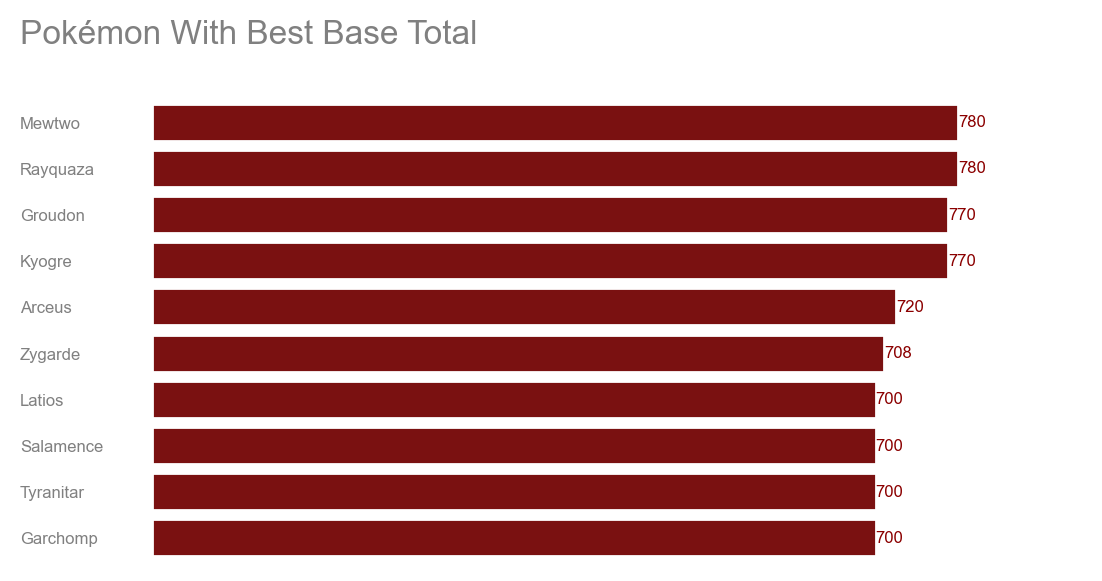

In [39]:
top10_pokemon_base_total = pokemon_df.loc[:, ['Name', 'Base_Total']].sort_values(
    by='Base_Total',
    ascending=False,
)[:10].reset_index()

seaborn_plot(
    top10_pokemon_base_total,
    sns.barplot,
    {
        'orient': 'h',
        'x': 'Base_Total',
        'y': 'Name',
        'color': 'darkred',
    },
    'Pokémon With Best Base Total',
    xlabel_kws={'xlabel': ''},
    xticks_kws={'labels': []},
    ylabel_kws={'ylabel': ''},
    yticks_kws={'ha': 'left'},
    pad_yticks=True,
    despine_kws={
        'top': True,
        'right': True,
        'left': True,
        'bottom': True,
    },
    data_labels_kws={
        'fmt': '%0.f',
        'color': 'darkred',
    },
    align_with='ytick_labels',
)

And we have a tie, Mewtwo and Rayquaza are the best!

# Key Findings
 * Water type pokémon are the most common, followed by normal and grass.
 * Generation 3 has the easiest pokémon to catch, while generation 4 has the hardest.
 * Legendary pokémon are easier to capture from generation 6 onwards.
 * Fairy type has the easiest pokémon to catch, while dragon has the hardest.
 * The easiest legendary pokémon to catch are of type grass and bug.
 * Generation 4 has the best pokémon, while generation 3 has the best legendary pokémon.
 * Mewtwo and Rayquaza are the best pokémon.


# References

1. (2020). Pokemon Data Visualization. Available at: https://www.kaggle.com/shreekant009/pokemon-data-visualization/notebook
2. Agarwal, L. (2018). Data Visualization - Pokemon Data. Available at: https://www.kaggle.com/lakshyaag/data-visualization-pokemon-data
3. (2019). Pokémon! Kaggle Learn Edition. Available at: https://www.kaggle.com/aplayer98/pok-mon-kaggle-learn-edition
4. Coetzee, J. (2018). DataVis Battle Entry: Getting to know my Pokémon. Available at: https://towardsdatascience.com/reddit-datavis-entry-getting-to-know-my-pok%C3%A9mon-e0bcf4b4b803
5. Verma, A. (2018). GgPlot ‘Em All | Pokemon. Available at: https://towardsdatascience.com/exploratory-analysis-of-pokemons-using-r-8600229346fb
6. The Python Graph Gallery. (2018). Radar Chart. Available at: https://www.python-graph-gallery.com/radar-chart

**If you like this notebook, please give it an upvote as it keeps me motivated. Plus, I am open to feedback.**